<a href="https://colab.research.google.com/github/govardhan-06/practice-Notebooks/blob/main/Handling_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning Algorithm sensitive to Outliers
* Naive Bayes Classifier: Not sensitive
* SVM: Not Sensitive
* Linear Regression: Sensitive
* Logistic Regression: Sensitive
* Decision Tree Regressor or Classifier: Not Sensitive
* Ensemble(RF, XGBoost,GB): Not Sensitive
* KNN: Not Sensitive
* KMeans: Sensitive
* Heirarichal: Sensitive
* PCA: Very Sensitive
* Neural Networks: Sensitive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ipython-input-4-a9ae5d3ed9e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

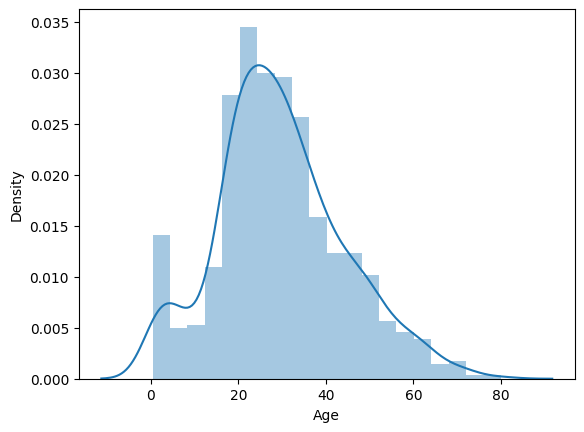

In [4]:
sns.distplot(df['Age'].dropna())

<ipython-input-5-48af3b413903>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

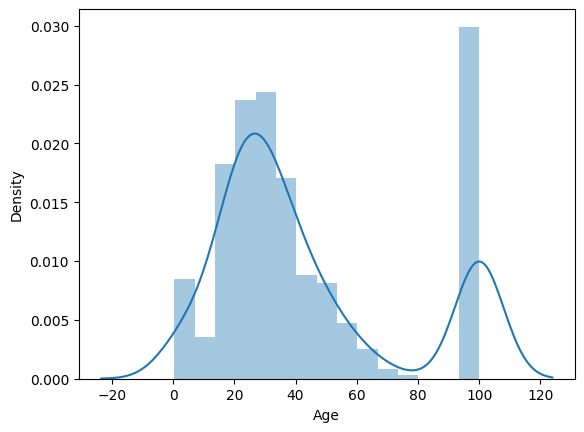

In [5]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of people')

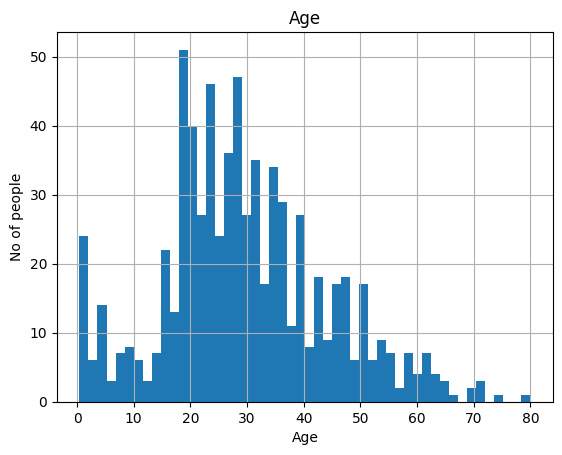

In [6]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of people')

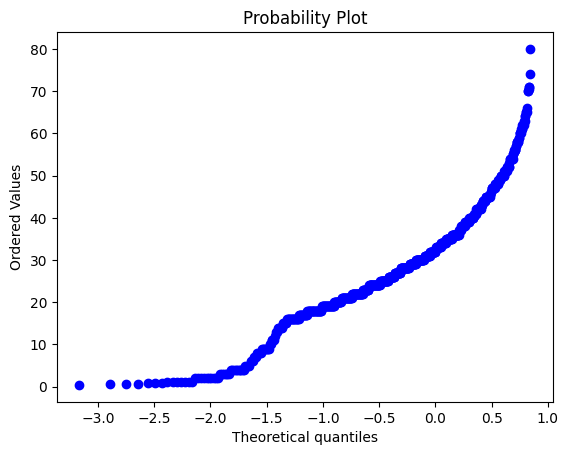

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(df["Age"], dist="norm", plot=plt)
plt.show()

### Gaussean or Normal Outliers

<Axes: ylabel='Age'>

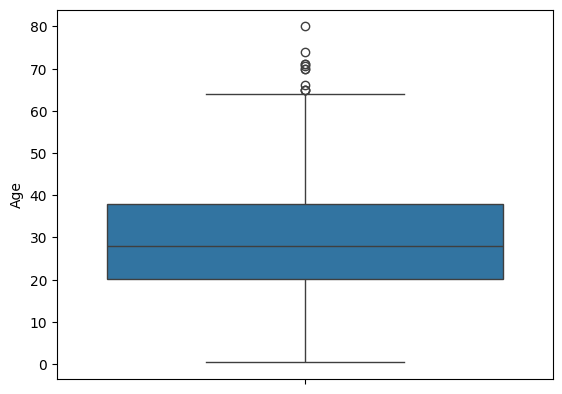

In [9]:
sns.boxplot(data=df["Age"])

In [12]:
#Calculating the boundaries to differentiate outliers
upper_limit=df['Age'].mean()+3*df['Age'].std()
lower_limit=df['Age'].mean()-3*df['Age'].std()
print(upper_limit)
print(lower_limit)
print(df['Age'].mean())

73.27860964406094
-13.880374349943303
29.69911764705882


In [13]:
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

17.875

In [14]:
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-6.6875
64.8125


In [15]:
#Extreme Outliers
lower_bridge=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-33.5
91.625


Text(0, 0.5, 'No of people')

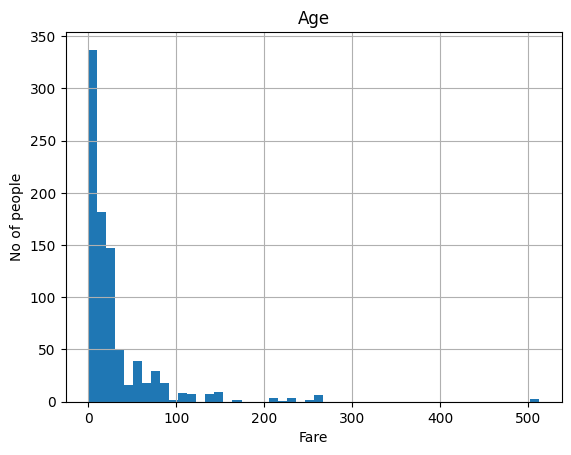

In [16]:
#Feature is skewed
figure=df.Fare.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Fare')
figure.set_ylabel('No of people')

### Skewed Dataset

<Axes: ylabel='Fare'>

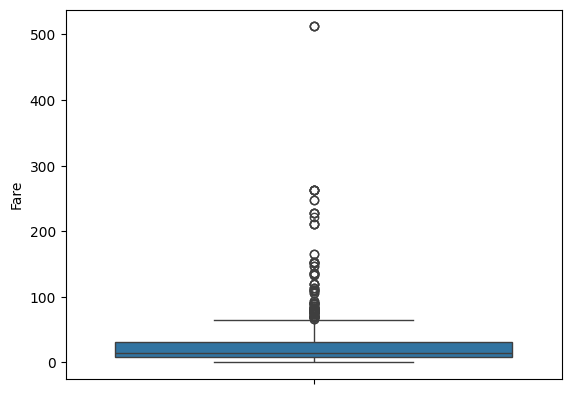

In [18]:
#Data is highly skewed
sns.boxplot(data=df["Fare"])

In [19]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-18.9021
57.8125


In [24]:
#Extreme Outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-45.7146
84.625


In [26]:
data=df.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
#Removing the outliers
data.loc[data['Age']>=73,'Age']=73

In [29]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of people')

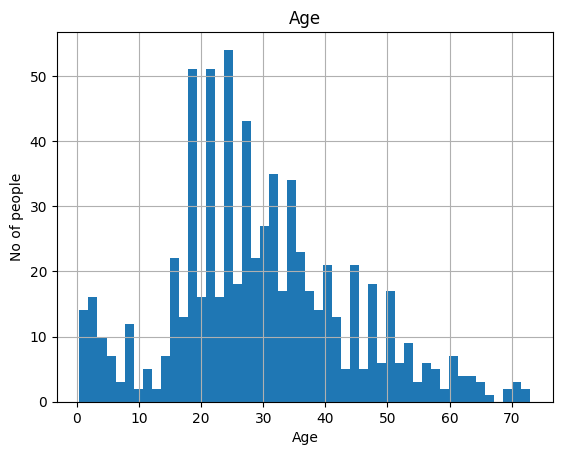

In [32]:
figure=data.Age.hist(bins=50)
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("No of people")

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [34]:
##Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [37]:
classifier.score(X_test,y_test)

0.7164179104477612

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [39]:
classifier.score(X_test,y_test)

0.6492537313432836